# 💻 UnpackAI DL201 Bootcamp - Week 1 - Concepts: Tensors

## 📕 Learning Objectives

* Conceptualize the concept of Tensors in the context of machine learning and their benefits.
* Identifiy the differences of important data structures such as Python lists, Numpy arrays and Pandas DataFrames.

## 📖 Concepts map
* Common Python data structures (collections)
* Python lists
* Numpy arrays
* Pandas DataFrames
* Pytorch Tensors


## 💬 AI discussion:

Deep Learning research continues to grow at an astonishing rate, AI adoption by companies and deployment on commercial products is also increasing. Still, there is a wide gap between the two. Altough the most popular tools support production environments and there is an abundance of resources like never before, many companies are cautions about the usage of AI in their products, others did not obtain the expected growth or impact they expected and in many cases the project fail or do not scale.

Below there are some areas where common mistakes are made in the use of AI. Let's discuss briefly what issues can you identify on these areas and how do you think they could be avoided or mitigated. Also, how do you think these problems or issues would be different between a startup that intents to create an AI-based product and an established company that already has a product that is already in production and desires to implement a new AI-based feature.

* Business liders' perception of AI.
* Business approach to AI and task/goal alignment.
* Data collection, sharing, storage and structure.
* Ethics, regulations, fair use, and data protection.
* AI management, flexibility, and scalability.
* Home-grown vs outsourced AI, observability, and monitoring.
* AI education, blind trust or lack thereof.

Quotes from the article about the book: "Predicion Machines" book as mentioned on: https://bdtechtalks.com/2020/09/07/prediction-machines-review-ai-business/

- “Computers lowered the price of arithmetic. The internet reduced the cost of distribution, communication, and search. And machine learning has reduced the cost of prediction, something that previously required extensive human cognitive labor and expertise.”
- “Prediction machines rely on data. More and better data leads to better predictions. In economic terms, data is a key complement to prediction. It becomes more valuable as prediction becomes cheaper,”
- “A prediction is not a decision. Making a decision requires applying judgment to a prediction and then acting,”

- “Prediction machines are not a substitute for human judgment. They are a tool for making better decisions.” (GitHub Copilot, 2022)





# Introduction

Data is the lifeblood of AI. No matter how complex and sophisticated a model is, it will not be any good without quality data.

As a result, it is very important to know how about the forms data takes on a computer. This is the first step in being able to understand more about AI. 

If we can understand how data is stored, and have an appreciation for the importance of good quality data, we can start to use AI models for our own purposes.

The requirements of data depend on how one wants to use it. If one is writing a script to automate a task or making a simple, low traffic web app, it is more important to write the code quickly than looking for high performances. 

On the other hand, for scientific computing, or industrial systems, it is more important for the program to run fast, even if it means that it would need more people and more time to develop it.

This dichotomy is expressed as **development time** VS **compute time**. 

For deep learning systems, there is a strong requirement for performance and speed. As a result, a datatype was implemented for AI, called a **tensor**, which can be extremely fast because it was designed to be run **in parallel** (on a GPU)

Much of this course will be about how to quantify data so that it is useful for AI models. To get there, we'll start from the most fundamental, step by step, to the cutting edge of tensors.  

## Key Ideas 

In this notebook, these ideas will come up across different concepts and skills. 

* Numerical VS Text Data

* Quantitative VS Qualitative

* Structured VS Unstructured Data

* Computing Speed VS Development Speed

Besides, we will present data types based on their dimension :

* 0D Data Points (Scalars)

* 1D Lists and Vectors

* 2D Tables and Matricies 

* 3D RGB images


# Part 0 : Code preparation

In [1]:
# package download and version control

# note : Kaggle uses python 3.7 kernel
# note : use -Uqq to reduce the number of messages (verbosity) during installation

!pip install -Uqq openpyxl==3.0.9          
#!pip install pathlib2==2.3.7.post1   # automatically installed in the current version of Kaggle
#!pip install torch==1.9.1            # automatically installed in the current version of Kaggle
#!pip install pandas==1.3.5           # automatically installed in the current version of Kaggle
#!pip install numpy==1.21.6           # automatically installed in the current version of Kaggle
#!pip install torch==1.9.1            # automatically installed in the current version of Kaggle
#!pip install matplotlib==3.5.1       # automatically installed in the current version of Kaggle
#!pip install Pillow==9.0.1           # automatically installed in the current version of Kaggle

In [2]:
# check the current installed version of one package (here, we use numpy as an example)
!pip freeze | grep numpy

msgpack-numpy==0.4.7.1
numpy==1.21.6


In [3]:
# package imports 
from pathlib import Path
import pandas as pd
import numpy as np
import torch as t

In [4]:
# import data files (tables, images, etc) from UnpackAI github
!git clone https://github.com/unpackAI/DL201.git

# Kaggle Config
IMAGE_DIR = Path('/kaggle/working/DL201/img') #uncomment for Kaggle
DATA_DIR = Path('/kaggle/working/DL201/data')

# Local Config on Unix machines
#DATA_DIR = Path.home()/'Datasets/unpackAI/DL201/data' #uncomment/adjust for local machine
#IMAGE_DIR = Path.home()/'Projects/unpackAI/DL201/img'  #uncomment/change for local machine

Cloning into 'DL201'...
remote: Enumerating objects: 856, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 856 (delta 81), reused 76 (delta 45), pack-reused 725
Receiving objects: 100% (856/856), 55.76 MiB | 26.60 MiB/s, done.
Resolving deltas: 100% (503/503), done.


# Part 1: Text and Numbers
<hr style="border:1px solid gray"> </hr>

Let's begin with the most simple data points. Just as novels are created out of words, AI models are created out of numbers. 

## 1.1 Text
Text represent human language and ideas. It is very freely structured in order to capture many different qualitative ideas. 

Text has meaning to people, but is quite different than numbers. Text can do a great job for representing ideas that people can understand, but this presents a problem. Computers don't traditionally handle text data that well since text doesn't have any formal logical or mathematical meaning. This is a major challenge which NLP (Natural Language Processing) overcome just a few years ago.

To summarize this :

* Text is qualitative
* Text is unstructured
* Text represents ideas that mean something to people

## 1.2 Numbers
Numbers serve a different purpose than text. They hold quantitative meaning. Numbers have relationships to each other that text doesn't. You can add or subtract numbers together, which means that numbers, of the same unit. 

As a result, numbers have these properties which allow us to do quite a lot with them. Numbers also have special properties which form the basis of geometry and calculus. If we take this idea further...

***If our data is made of numbers, we can input our data into models and formulas.***

Models and formulas run the world around us. Models can be used for something as simple as a controlling a room temperature air conditioner, creating predictions and sales forecasts or evn predicting the weather with complex simulations. If we have a model, it gives us the ability to take data and turn it into information.
If we have information, we can explain a trend in a way that is useful to people compared to a massive block of unsorted data.
If we can create models, we can ***explain reality*** and even ***make predictions***.

## 1.3 Different types of numbers
<hr style="border:1px solid gray"> </hr>

### 1.3.1 Integer and floats

While physics and computing get along beautifully in many cases, they do have a fundamental disagreement. The problem is summarized below :

* Physics and most fields of mathematics are continuous and infinite
* Computers are finite and discrete

At a fundamental level, Calculus, and therefore many of the lines and models we use, relies on an assumption that the lines that it models are continuous, which means that the line doesn't have any breaks inside of it.

And by using that assumption, we are able to know what the slope of a line is at any point on the line.

For example, for us, the number 1 and the number 0.999999999999999999999 have essentially the same value. However, for a computer, working with 1 is definitely easier and faster than working with float with such a high precision.

This is not easy to implement on computers because they are discrete at their core. A transistor can only be 1 or 0, with no in between state. This is quite different than the real world we live in, which can be at any value in between.

Instead, a compromise is made, with two kinds of numbers in low level computing, numbers with decimal places, and numbers without decimal places. 

### 1.3.2 Implicit Casting

Python will do this automatically based on whether a number were defined with a decimal point in it or not.

In [5]:
integer = 127
floating_point = 127.0

In Python, this difference is not very important because this is a high level language, which automated a lot of verifications.
In low level programming languages like C or Fortran, we have to tell the program more details on our data. This is because python is smart enough to guess what you want to do with the numbers. However, this takes time and resources for python to guess what you mean. In cases such as web development, high level languages are often preferred because it saves a lot of time which would have been spent coding out the little details.

Scientific computing languages can run many times faster than normal python code. This is because you tell it exactly what to do. Decades of research have gone into creating algorithms that can process data in the most efficient way. 

This was very important in the mid 20th century because computers were not that powerful yet and every bit of performance was needed.

However, in Python we have the option to make a compromise between the convenience of high level languages and the speed of low level languages. This is available to us through the scientific computing libraries. Python serves as a user friendly, and more efficient wrapper that allows us to utilize both decades of highly efficient legacy codes and user friently general purpose tools.

Although this goes onto a detour on computing history, the key point is that with Deep Learning, the data becomes quite large and affect performance. If we can efficiently store numbers, we can drastically improve performance and memory usage. 

One example in pytorch tensors is called the .to_fp16 method. This allows us to store 400% more numbers on the GPU's RAM than using the default Float64 or int64. Consider this point when you are using large data sets. 


## 1.4 Putting Text and numbers together
<hr style="border:1px solid gray"> </hr>

This section will define how the world of text and numbers can clash in computer science. Python does a great job to solve this problem by allowing us to deal with text data much more effectively than in plain C language. 

The Pandas library, which we will get into, takes this to the next level.

In [6]:
string = 'string'

In the strictest sense of it, you cannot do math on a letter or a piece of text meanwhile real world data often comes in as text. So, the power of Machine Learning and Data Science in general is to transform something as qualitative as text data into numbers.

The purpose of this course is to learn how to turn what comes in as something qualitative, into nice tensors that fit into an AI model. 

The code below illustrates the problem of trying to do math with texts. If you uncomment and run the code below.

In [7]:
#'a' * 'a'

This seems obvious, but it presents a problem because it points the fact that there is no ready way to get a computer pass text data into a mathematical AI model. Likewise we cannot add together a letter and a number

In [8]:
#string + 2

What does this error message mean?


## 1.5 Python Text Processing
<hr style="border:1px solid gray"> </hr>

However, in the real world, we might actually want to multiply strings, and Python is designed to be very flexible and is good at guessing what you want to do.

Let's try the next example: Run the code and guess what will happen.

In [9]:
string * 2 

'stringstring'

In [10]:
'a' + 'a'

'aa'

When handling real world data, this inference can be very useful. 
Python's strength is being able to handle text data.

If we want to combine them we can convert them. What do you expect to happen in the next cell?

In [11]:
string + str(2)

'string2'

In [12]:
#try more code here

## 1.6 Conclusion

We can use python to handle different data types without worrying too much about type compatibilility. This is part of why it is so common as a scripting language. 

However, this is paid for in making the program much slower. Usually this is an accepable trade off because it is expensive to pay software developers to develop applications. 

However, in AI applications, the scale of the data that gets involved is much larger. So, performance becomes a lot more important.

We can use python to handle these kinds of data, but if we want to get maximum performance, we need to specify the type of data because it slows python down to have to check it.

### Recap

* Text is qualitative
* Numbers are quantitative


* Numbers are structured
* Text is unstructured


* Numbers are useful for AI models
* Text cannot be used directly in AI models

# Part 2: Lists and Vectors  (1D Data)
<hr style="border:1px solid gray"> </hr>

## 2.1 Python Lists

Data rarely comes in a single point, and has to be organized somehow. The most simple way to organize data is using a list.

Lists put data into a line, in a way that is useful for keeping track of things. 

One of the key benefits of using python lists, it that they do not care what you put inside them. 

In [13]:
list_a = ['a','b','c']
list_1 = [1,2,3] 
list_1a = [1,2,3,'s'] 

In [14]:
print(list_a, list_1, list_1a)

['a', 'b', 'c'] [1, 2, 3] [1, 2, 3, 's']


As we can see, if we add these lists together, it assumes that we want to put the lists together. There are many cases where this is the most useful thing somebody would like to do. It is pretty practical.

In [15]:
[1,2,'e'] + ['a',5,6]

[1, 2, 'e', 'a', 5, 6]

But, you can't multiply lists, or subtract items from them . if we wanted to remove an item from a list,  we can't subtract it out. This is not clear enough for python

In [16]:
#list_a - list_a[-1]


Instead, we can select elements from the list like this.

In [17]:
list_a = list_a[0:1]

Likewise, we can't multiply lists because it's not clear to python what it should do. 

In [18]:
# will cause an error 

#[1,2,'e'] * ['a',5,6]

However, we can multiply a list by a number because python assumes that we want to make three copies of the list.

In [19]:
['fizz ', 'fizz', 'fizzbuzz'] * 3

['fizz ',
 'fizz',
 'fizzbuzz',
 'fizz ',
 'fizz',
 'fizzbuzz',
 'fizz ',
 'fizz',
 'fizzbuzz']

In Python a list can contain anything. Which prevents it from following strict mathematical rules. You can't have your cake and eat it too. However, there is still quite a lot you can use them for. In your project, you will almost surely use lists to hold data. 

Compared to strict mathematical definitions used in scientific computing, we can use lists a lot more like how a person would use a list.



In [20]:
[1,2,3] + [1,2,3]

[1, 2, 3, 1, 2, 3]

As this example shows, we can't add numbers together inside of a python list, because they are not set up as numbers, but rather objects. 

Instead, there is another library set up for this purpose

## 2.2 Numerical Arrays (Vectors)
<hr style="border:1px solid gray"> </hr>

However, despite it's general usefulness, the rules of a list are very different than what is used in mathematics and therefore AI. So, to solve this problem, we will use numpay arrays instead of python standard lists. Let's see what they can do !

In [21]:
import numpy as np

sample_array1 = np.array([1,2,3,4,5])
sample_array2 = np.array([3,6,3,7,2])

In [22]:
sample_array1 + sample_array2 

array([ 4,  8,  6, 11,  7])



Arrays can be incredibly powerful because they can represent elements of reality. But, they follow different rules which are important to understand before getting too far into using scientific computing libraries.

### 2.2.1 Tensors, Matrices, and Vectors, explained through a story
<hr style="border:1px solid gray"> </hr>



---
The following explaination can help us to understand the power of arranging numbers into multidimensional structures like arrays and tensors. 

It is taken from NASA's website directed at univeristy level Engineering students. It is rephrased into simple English for an international audience.

---



At the heart of all mathematics are numbers.

If I were to ask how many candies you had in a bag, you might answer, “Three.” I would find
your answer tells me enough. The ‘bare’ number 3, a magnitude, is enough to give the
information I want.

If I were to ask, “How far is it to your house?” and you answered, “Three,” however, I would
get confused and ask, “Three what?” Clearly, for this question, more information is needed. 

The bare number 3 is no longer enough; I need to know a unit. 3 could mean anything from 3 minutes, 3 kilometers, to 3 meters.

Suppose you got upset and answered, “Three km.” The number 3 is now named as representing a certain
number of km.

Such numbers are sometimes called **scalars.** Temperature is represented by a
scalar. Any number with a specific unit is represented by a scalar.


If I were next to ask “Then how do I get to your house from here?” and you said, “Just walk
three km,” again I would look at you strangly.

This time, not even a number with a unit is sufficient; it is necessary to specify a direction.
“Just walk three km due north.” The denominate number 3 km now has the required additional
directional information attached to it. Such numbers are called **vectors.** 

If you were to tell me that to go from here to your house I must walk three blocks
east, two blocks north, and go up three floors, the vector extending from “here” to “your house”
would have three spatial components: 

1. Three blocks east 
2. Two blocks north
3. Three floors up

The confusion comes about vectors when they are used to represent locations and velocities.

But how they are also used in advanced mathematics to represent complex concepts covered in higher level mathematics. 

There are many different notations for vectors for different areas of engineering and mathematics. 

### 2.2.2 Key Points about Vectors
<hr style="border:1px solid gray"> </hr>

Instead, if you want to do math with python, there's another data type called a ***vector*** or ***array***.

* Vectors can only contain numbers. If an item inside of it doesn't have a number, it becomes a list.

This is a critical distinction to make because vectors are used in models. Remember, models can only accept numbers and nothing less.

As a result, it also does not follow the same rules that a python list would follow. 

The data type we will be using here is called a numpy array. This is made for mathematical calculations, and mathematical calculation alone. Some of the smartest people on earth spent decades trying to figure out how to do these calculations to do these calculations efficienctly and quickly. 

and inst follows the stricter rules of math. This means that it is a bit tricker to start using them, but once we understand the rules, they behave in very predicatable ways.

In AI, numpy is very common because it allows us to pass data around from different libraries.

In the following example we are going to use numpy with matplotlib to create a plot.

But first, let's show how a vector is different than a list 

In [23]:
import numpy as np
from matplotlib import pyplot as plt

# Let's put two arrays together and see what happens

array1 = np.array(list(range(1,11))) # Keep in mind that 10 is not included because it is the bound < 10.
print(array1)
array2 = np.array(list(range(2,22,2)))
print(array2)

[ 1  2  3  4  5  6  7  8  9 10]
[ 2  4  6  8 10 12 14 16 18 20]


In [24]:
fake_array = np.array(['a',1,2,3,4,5,6,7,8,9])

Try to uncomment the following line of code to see what happens when you try to treat an array as a list 

In [25]:
#fake_array + array2


The error code means that you are trying to do math on something that is not a number. This is important to keep in the back of your head

Let's visualize the two arrays below on this graph.


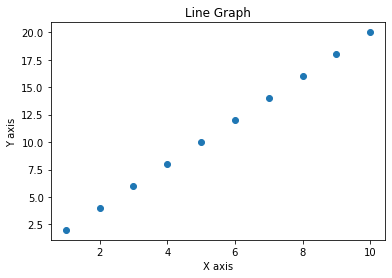

In [26]:
x = array1
y = array2

# These lines label the graph 
plt.title("Line Graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")

# This line tells matplot lib which kind of graph we want
plt.scatter(x,y)

# This line tells matplotlib that we would like to display the graph in ipython notebook
plt.show() # if you don't include this line, it will still work, but will be messier

For more information on how to use matplotlib, you can go to: https://www.geeksforgeeks.org/plot-line-graph-from-numpy-array/ which has a good tutorial

Since we can perform mathematical operations on these arrays, unlike normal python lists, check out the following lines of code, try to think why it works the way it does. Feel free to play around with these.

Pay attention to the graphs here and  how the numbers on the axis's change 

[ 2  4  6  8 10 12 14 16 18 20]
array 2 to the power of 2:
[  4  16  36  64 100 144 196 256 324 400]


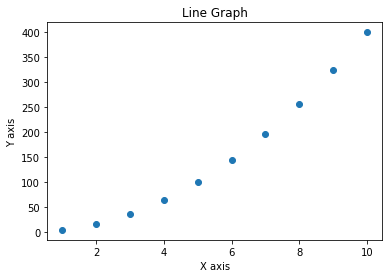

In [27]:
scalar = 2

print(array2)
print(f'array 2 to the power of {scalar}:')
print(array2 ** scalar)


x = array1
y = array2 ** scalar

# These lines label the graph 
plt.title("Line Graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")

# This line tells matplot lib which  graph we would like to use
plt.scatter(x,y)

# This line tells matplotlib that we would like to display the graph in ipython notebook
plt.show() # if you don't include this line, it will still work, but will be messier




You can also perform mathematical operations on other vectors, as long as they are both the same length. If they aren't the same length, they won't fit. 

Let's create a new vector and try some basic broadcasting

In [28]:
scale_factor = 5
vector1 = array2 * scale_factor

Adding them together gives the following results

In [29]:
print(f'vector #1: {array1}')
print(f'vector #2: {vector1}')
print('vector 1 plus vector 2 =')
print(vector1 + array1)
print('/////////////////')
print(f'vector #1: {vector1}')
print(f'vector #2: {array2}')
print('vector 1 divided by vector 2 =')
print(array2 / vector1)

vector #1: [ 1  2  3  4  5  6  7  8  9 10]
vector #2: [ 10  20  30  40  50  60  70  80  90 100]
vector 1 plus vector 2 =
[ 11  22  33  44  55  66  77  88  99 110]
/////////////////
vector #1: [ 10  20  30  40  50  60  70  80  90 100]
vector #2: [ 2  4  6  8 10 12 14 16 18 20]
vector 1 divided by vector 2 =
[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]


## 2.3 Recap
<hr style="border:1px solid gray"> </hr>

* Arrays and lists have different properties

* Lists are flexible and can contain anything

* Arrays can only contain numbers

* Arrays are much more efficient than lists thanks to parallel programming



# Part 3: Tables and Spreadsheets (2D)
<hr style="border:2px solid gray"> </hr>


##  3.1 Introduction on Tables 
<hr style="border:1px solid gray"> </hr>


A list is already a powerful way to organize data. However, they have their limitations. Since they are only 1D, they can only model things simple enough to fit into one column or row. A table is the next step  towards representing more complex information.

People have used tables for over 5000 years to create records. Starting with recording farming transactions  on clay tablets, to the computerized databases of today, these form a foundation of modern life.


## 3.2 Matrix (Matrices) are 2D Arrays
<hr style="border:1px solid gray"> </hr>


Similar to how a vector is a list containing only numbers, a matrix is a table filled with only numbers. Matrices can power up vectors to the next level. Matrices can model many different phenomena.

In Finance, they can be used to calculate and model profit maximization and loss minimization problems, as well as risk management. 

In Science, they are used for wireless communication, electronics engineering, chemistry, geology, robotics and cryptography.

Our computer screen graphics are based of them because it allows programs to easily calculate how an object appears when it is rotated or moves on a screen. Before computers became this powerful, this kind of drawing would have been done by hand by hundreds or thousands of animators. 

There are many ***Free and Open Source Softwares*** (FOSS) libraries in python to do all sorts of tasks. Creating matrices out of mere tables is the key to accessing these amazing skills and abilities.

And if you have a matrix, then it can be converted into a tensor, which can then go into an AI model. 

## 3.3 Pandas Dataframes
<hr style="border:1px solid gray"> </hr>


The problem with matrices is that they have strict rules that aren't always directly compatible with the real world. Unlike an excel spreadsheet, which doesn't care if we have text or numbers in a field. A matrix will no longer be a matrix if it holds something that isn't a number. 

A great compromise between an efficient number-only matrix and a non-efficient list of list which can contains text data is presented by Pandas. It was created on Wall Street by a quantitative analyst Wes Mckinney, who had been hired by a large firm for his math and programming background rather than the traditional business one. He found himself spending a lot of time extracting data from excel spreadsheets, SQL databases, and even PDF and Word Documents, without having a single tool to handle all of them.

Pandas allows us to keep data in tables, all under one roof with many different methods to handle the data in a clean and efficient way.

Offering the flexibility of python and excel, while tapping into the power of scientific computing. Pandas's strength is inputting messy data that contains missing values, text data, human errors, or even duplicates that would drive numpy crazy.

Here, you can see how you can very quickly clean up data and get basic statistics using it. Let's input an .xlsx (excel) document and take a look at it.

In [30]:
import pandas as pd #needs to have installed openpyxl library
personal_loans = pd.read_excel(DATA_DIR/'BankLoans'/'Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)
personal_loans.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
893,894,58,32,43,93943,3,1.4,1,0,0,0,0,0,1
4348,4349,59,33,99,92093,2,2.7,1,0,0,0,0,0,0
1855,1856,65,39,30,94304,3,0.7,2,0,0,0,0,1,1
2635,2636,40,14,33,95616,2,0.8,3,89,0,0,0,1,0
1779,1780,34,9,68,94720,1,2.8,1,0,0,0,0,1,0


This excel table is now a 2D dataframe. 

In [31]:
# Let's look at the data 
personal_loans.shape

(5000, 14)

How many rows and columns does this dataframe have? Do you see any interesting information?

Let's take a look at each column 

In [32]:
personal_loans.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [33]:
personal_loans['ZIP Code'].shape

(5000,)

We can even get statistics on each column almost immediately. 

In [34]:
# Each Column is 1D
personal_loans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## 3.4 Pandas Series (1D data in 2D world)
<hr style="border:2px solid gray"> </hr>

Now, as we know python lists are very flexible data types, but they are not designed with the same considerations as tabular data. For example, lists are computationally slow, and aren't necessarily designed for the workflow of AI and deep learning. 

To reiterate, a vector, matrix, or array can only contain numbers because then it loses its mathematical meaning. This can become problematic in Pandas Dataframes, because a row, or instance can often contain many different data types.

A ***Pandas Series*** retains many of the advantages of fast computing, while remaining flexible upon the data it can handle. Not only does it do this, but it assigns human readable metadata to each feature that allows us to access everything cleanly.

To show you this in an example, let's demonstrate what happens when you pull out a row of only numbers, and a row that has both numbers and text data from a Pandas DataFrame.

Let's examine one of the rows of this data frame. Pay attention to the shape of this. Why is it this shape?

In [35]:
instance = personal_loans.iloc[1]
print(f'shape of this pandas series: {instance.shape}')
print(instance)

shape of this pandas series: (14,)
ID                        2.0
Age                      45.0
Experience               19.0
Income                   34.0
ZIP Code              90089.0
Family                    3.0
CCAvg                     1.5
Education                 1.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        1.0
CD Account                0.0
Online                    0.0
CreditCard                0.0
Name: 1, dtype: float64


In this example, everything is the same data type. This is very convenient because we can create a pure numpy array with it quite easily.

In [36]:
rawArray = personal_loans.values

In [37]:
rawArray[0]

array([1.0000e+00, 2.5000e+01, 1.0000e+00, 4.9000e+01, 9.1107e+04,
       4.0000e+00, 1.6000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [38]:
# If we multiply this, it behaves in a predictable manner
instance + 100

ID                      102.0
Age                     145.0
Experience              119.0
Income                  134.0
ZIP Code              90189.0
Family                  103.0
CCAvg                   101.5
Education               101.0
Mortgage                100.0
Personal Loan           100.0
Securities Account      101.0
CD Account              100.0
Online                  100.0
CreditCard              100.0
Name: 1, dtype: float64

Now, what if we changed one of the data types so that it is no longer uniform across the entire row. Numpy won't be able to handle this as well as pandas. In the real world this means much higher productivity because you can mix data types which is common when dealing with real world data. 

In [39]:
personal_loans['ZIP Code'] = personal_loans['ZIP Code'].astype('str')

Let's say that we don't want our program to interpret zip codes as a continuous variable, and treat them as unique identifiers instead. Although there is lots of information that can be extracted from zip codes, ZIP codes are a categorical variable.

* Let's take another look at this 

In [40]:
instance = personal_loans.iloc[1]
print(f'shape of this pandas series: {instance.shape}')
print(instance)

shape of this pandas series: (14,)
ID                        2
Age                      45
Experience               19
Income                   34
ZIP Code              90089
Family                    3
CCAvg                   1.5
Education                 1
Mortgage                  0
Personal Loan             0
Securities Account        1
CD Account                0
Online                    0
CreditCard                0
Name: 1, dtype: object


As you may have noticed, the data type of this Pandas Series is now an object. This means that it is very general. This is one of the strengths of Pandas in it's ability to handle these kinds of real life situations. Let's see what happens when we start to use numpy or Pytorch with this same data directly.

This catches all datatype, a pandas series, is a lot more resilient and easy to use than a numpy array. because it has human readable columns. 

In [41]:
instance

ID                        2
Age                      45
Experience               19
Income                   34
ZIP Code              90089
Family                    3
CCAvg                   1.5
Education                 1
Mortgage                  0
Personal Loan             0
Securities Account        1
CD Account                0
Online                    0
CreditCard                0
Name: 1, dtype: object

Although this works, it leads to some unpredictable behavior. What happened in this code which is undesired? Also, the below code produces an error, why? 

In [42]:
#np.array(instance) + 3

Instead, what pandas allows us to do is to access each feature by a name that we can assign to the column. This allows for the code to be much more legible than indexing a numpy array with numbers that don't mean anything to us. 


In [43]:
instance['Income']

34

# Part 4 : Tensors (3D or more)
<hr style="border:2px solid gray"> </hr>

The last point covered here is going to be 3D or greater arrays. The area that this gets used most often is in color images. 

It is important to note again that a tensor in physics or mathematics has a formal definition, where in Python, it refers to a data type. 

Now, let's get into tensors.

* A tensor in python is a datatype which is optimized for use on a GPU. 
* A tensor in science and engineering is a 3D+ matrix which contains only numbers.

## 4.1 Key Ideas

Rank: The rank of a tensor is what tells us the number of dimension it has.

* A rank 0 tensor is a number

* A rank 1 tensor is a 1D array or vector

* A rank 2 tensor is a 2D array or matrix

* A rank 3 tensor is a 3D array or tensor


***Pytorch Tensors***

Tensors are useful in AI because they can be stored directly on a GPU, which saves a lot of time having to move between different parts of the computer. DDR4 RAM can be transferred at around 25 Gb per second, while GPUs can go into  hundreds of Gb per second, and continue to climb. This make a huge difference in deep learning. For a fun example of how this works, you can check out this youtube video.

https://youtu.be/-P28LKWTzrI

In [44]:
import torch as t

t.Tensor([1,2,3])

tensor([1., 2., 3.])

Pytorch tensors are very efficien 3D or more arrays, but to be efficient, they cannot accept other data than numbers, as you can see by uncommenting the line below.

In [45]:
#t.Tensor(['a','b','c'])

If an excel spreadsheet is 2D, with the properties of length and width, then a tensor is 3D or more dimensions.

For instance, to describe the size of an object, we could use a 3D tensor, which 3 coordinates contain its length, width, and height.

## 4.2 An Example of 3D Data: Image files

In [46]:
from PIL import Image
import numpy as np

grayscale_image = Image.open(IMAGE_DIR/'week1/unpackAI.png')
grayscale_image.show()

Before getting into 3D images, let's first take the matricial representation of a 2D image and see what is under the hood. It is basically a table with numerical values in it. These values are encoded in a way that a computer knows how white or how black to make a pixel. 

Often, you'll see a number between 0 and 1. You might also see a number between 0 and 255. This is because the maximum amount of information held in 1 byte is 256, which is 2 to the 8th power. 

In [47]:
grayscale_pixels = np.array(grayscale_image)

In [48]:
grayscale_pixels.shape 

# This is a greyscale image

(206, 244)

Feel Free to play around with the shape of the window. The  goal here is to understand the information as it is made. 

In [49]:
x_begin = 133
x_end = 143
y_begin = 133
y_end = 139
grayscale_pixels[x_begin:x_end,y_begin:y_end]

array([[ 5, 15,  8,  0,  0,  0],
       [ 5, 15,  8,  0,  0,  0],
       [ 5, 15,  8,  0,  0,  0],
       [ 5, 15,  8,  0,  0,  0],
       [ 5, 15,  8,  0,  0,  0],
       [ 5, 15,  8,  0,  0,  0],
       [ 5, 15,  8,  0,  0,  0],
       [ 5, 15,  8,  0,  0,  0],
       [ 5, 15,  8,  0,  0,  0],
       [ 5, 15,  8,  0,  0,  0]], dtype=uint8)

Let's step this up to the next level. The next image is going to have three dimensions rather than 2. This is because the array now needs to hold more information about color.

In [50]:
#{{filepath}}
color_image = Image.open(IMAGE_DIR/'week1/Rubiks_cube.jpg')

In [51]:
rgb_array = np.array(color_image)
rgb_array.shape

(1600, 1600, 3)

This is one pixel from the image. at x = 800 and y  = 800, there are three bytes of information. We can see that 

In [52]:
# One Pixel
rgb_array[800,800,:]

array([212, 206, 210], dtype=uint8)

In [53]:
rgb_array.shape

(1600, 1600, 3)

In [54]:
# A a row of pixels from the image 

rgb_array[800:805,800,:]

array([[212, 206, 210],
       [211, 205, 209],
       [211, 205, 209],
       [209, 203, 207],
       [208, 202, 206]], dtype=uint8)

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmplmihxxk_.PNG'


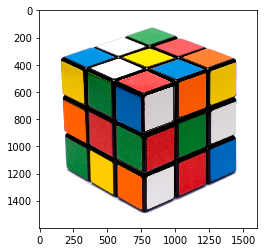

In [55]:
from matplotlib import pyplot as plt
plt.imshow(rgb_array, interpolation='nearest')
plt.show()

Let's crop out a 300 by 300 section of the image, so we can see the pixels better. 

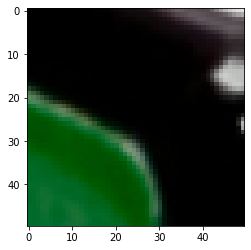

In [56]:
image_crop = rgb_array[500:550,500:550,:]
plt.imshow(image_crop,interpolation='nearest')
plt.show()

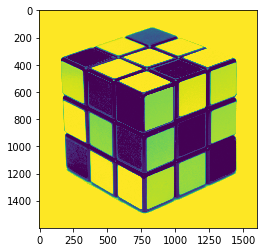

In [57]:
# red channel
red_channel = rgb_array[:,:,0]
plt.imshow(red_channel,interpolation='nearest')
plt.show()

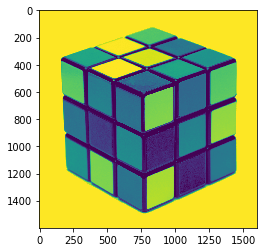

In [58]:
# green channel
green_channel = rgb_array[:,:,1]
plt.imshow(green_channel,interpolation='nearest')
plt.show()

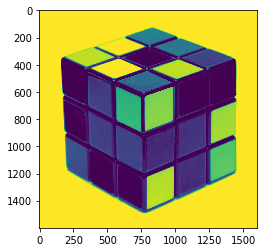

In [59]:
# blue channel
blue_channel = rgb_array[:,:,2] # The two is the 'B' in rgB
plt.imshow(blue_channel,interpolation='nearest')
plt.show()

## 4.3 A note about 4D and beyond

After 3D, our brains can no longer create ***visual*** representations of the objects. However, this can still be quite easy to understand it.

One example is video data. In this case, each 3D layer is a frame of the RBG array, extended into the 4th dimension which represents time. we can imagine the 4D aspect of it as time moving across the video.

Then, as we see in the video data example, a N+1 D data can always be as simple as a set of ND data. So, a set of 3 colors pictures would be a 4D data, a set of 4D data would be 5D data, and so one.

As a result, any numpy array or tensor can easily be flattened into a 1D array by collapsing the nested structure of it.


In [60]:
array2D = np.array([[1,1,1],[2,2,2],[3,3,3]])
array3D = np.array([array2D,array2D,array2D])
array4D = np.array([array3D,array3D,array3D])
array5D = np.array([array4D,array4D,array4D])

In [61]:
print('The number of elements in this 5D array is:', len(array5D.flatten()))
array5D.flatten()


The number of elements in this 5D array is: 243


array([1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2,
       2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3,
       3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1,
       2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3,
       3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2,
       3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1,
       1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2,
       2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3,
       1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2,
       2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3,
       3])

# Part 5: Recap and Discussion

High dimension data allow us to describe complex objects.

For instance, to describe geometrical shapes :

1. A line is 1D, with the property of length
2. A square is 2D, with the properties of length, and width
3. A cube is 3D, with the properties of length, width, and height

And we could have added more dimensions to describe their position in a 2D picture or 3D video game environnment. 

Similarly, if we look at many areas of life, we come across these concepts.

1. An Excel table is 2D, with the properties of length, and width
2. One Row of an Excel table is 1D with the property of width
3. One Column of an Excel table is also 1D, having the property of length

In which other areas have you encountered 1D, 2D, or 3D representations?


### Key points

* To be used by AI models, data will have to be represented numerically

* Data types have different purposes (different precision, computing speed, space in the memory)

* Structured vs Unstructured

* Quantitative vs Qualitative data 

* Dimensions (rank)

### Questions

1. What is a rank-3 Tensor? What kinds of data can it represent?

    A. a 4D array, that can represent more complex data such as video or weights and layers within a neural network

    B. a 3D array, that can represent grayscale images, scientific data, or financial reports

    C. a 3D array, that can represent color images

2. What is a rank-0 Tensor? What kinds of data can it represent? 

3. What is .flatten()? How is a higher dimensional tensor represented in memory? 

4. What does the Pytorch method .to_fp16 do? Why would it increase performance? 

5. Why can't tensors include text data ? 

    A. Memory constrains make it impossible.

    B. Deep Learning models can only accept numbers because they are qualitative in nature. 

    C. Machine learning models can only accept numbers because they rely on the assumption that data must either be able to be expressed on a line/plane/hyperspace or as a probability. 

    D. Text data is inherently dirty. 

Open a dataset from kaggle, load the data while looking at notebooks which do the same, and see what form it takes?

Is it structured or unstructed?

What are the shape and rank of the different parts of the data?

Could these be represented differently?

### Appendix : Primitive types

In scientific computing, you can specicify how much memory resources should be given to each number. 

If you look, the default in python is int64. This allows the use of extremely large numbers. This is chosen as the default when memory resources isn't a big concern because there is almost no change somebody will accidentally exceed the limits.

This means that it is an integer between negative 9 quadrillion and positive 9 quadrillion or (-9,223,372,036,854,775,808 to 9,223,372,036,854,775,807).

These are extremely large numbers. Changes are, you won't need to use this much memory for your data. If you only have a few thousand int64 numbers in your application memory isn't a problem. What is a much bigger problem is inputting a larger number than the program can allow. This can create some errors you don't want to have because you built your program under the assumption that you will never need a number larger than the limit. Python is a general purpose language, keyword general. So this is the safest number to put as a default to avoid any potential problems. 

***You will have to choose the best data type to speed up our code, and save computer resources.*** 

Here is a table of different data types, which use significantly less resources than the default int64. It opens up a bit of danger, but if you are absolutely sure you will never use a number larger than the limits, we definitively encourage you to use them to speed up your program and reduce memory consumption.



<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<table>
<thead><tr>
<th>Data type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>bool_</code></td>
<td>Boolean (True or False) stored as 8 bits</td>
</tr>
<tr>
<td><code>int_</code></td>
<td>Default integer type (same as C <code>long</code>; normally either <code>int64</code> or <code>int32</code>)</td>
</tr>
<tr>
<td><code>int8</code></td>
<td>Byte (-128 to 127)</td>
</tr>
<tr>
<td><code>int16</code></td>
<td>Integer (-32,768 to 32,767)</td>
</tr>
<tr>
<td><code>int32</code></td>
<td>Integer (-2,147,483,648 to 2,147,483,647) -2 Billion to +2 Billion</td>
</tr>
<tr>
<td><code>int64</code></td>
<td>Integer (-9223372036854775808 to 9223372036854775807)</td>
</tr>
<tr>
<td><code>uint8</code></td>
<td>Unsigned integer (0 to 255)</td>
</tr>
<tr>
<td><code>uint16</code></td>
<td>Unsigned integer (0 to 65535)</td>
</tr>
<tr>
<td><code>uint32</code></td>
<td>Unsigned integer (0 to 4294967295)</td>
</tr>
<tr>
<td><code>uint64</code></td>
<td>Unsigned integer (0 to 18446744073709551615)</td>
</tr>
<tr>
<td><code>float_</code></td>
<td>Shorthand for <code>float64</code>.</td>
</tr>
<tr>
<td><code>float16</code></td>
<td>Half precision float: sign bit, 5 bits exponent, 10 bits mantissa</td>
</tr>
<tr>
<td><code>float32</code></td>
<td>Single precision float: sign bit, 8 bits exponent, 23 bits mantissa</td>
</tr>
<tr>
<td><code>float64</code></td>
<td>Double precision float: sign bit, 11 bits exponent, 52 bits mantissa</td>
</tr>
</tbody>
</table>

</div>
</div>
</div>

Source: https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html

In Short, if you need to improve the performance of your  code, you can choose a more efficient data type. float16 is four times smaller than float64, and int8 is 8 times smaller than int64. 

If you have tens or hundreds of thousands of rows, this can make a big difference in performance and prevent you from running out of RAM !